# Significant Color Extractor
The following implementation uses k-means clustering to extract the most significant color in a image. 
This can be used to implement tone based classification of images.

We have to find dominant color in a given image. I will be using an unsupervised learning algorithm (K-Means Clustering).

Steps ==>

1. Read Image and convert it in to a tidy format to work with.
2. Using Elbow method , i will find optimal number of clusters of given image.
3. I will recreate model with optimal number of Cluster.
4. I will use cluster center (RGB) value to show dominant color.



## pre-processing

In [67]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [68]:
# Import image class of matplotlib
import matplotlib.image as img
from os.path import exists

# Read the image and print dimensions
path = input("Input full image path: ")
if exists(path):
    image = img.imread(path)
    print("Shape of Image is ",image.shape)
else:
    print("Image does not exist")

Shape of Image is  (640, 640, 3)


Given Image is ===>


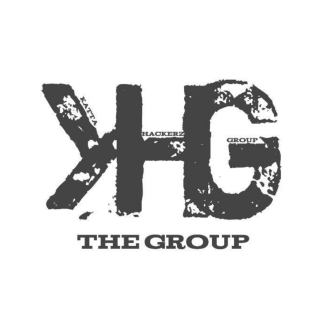

In [69]:
print("Given Image is ===>")
plt.figure(dpi=100)
plt.axis('off')
plt.imshow(image)
plt.show()

### Let us store RGB values of all pixels in lists r, g and b.

In [70]:
r,g,b=[],[],[]
for row in image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

# Scaling
Let us scale the data using SciPY Library

In [71]:
from scipy.cluster.vq import whiten #Whiten is used to Scale the data

scaled_red = whiten(r)
scaled_blue = whiten(b)
scaled_green = whiten(g)

In [72]:
import pandas as pd
df = pd.DataFrame({'red':r,'blue':b,'green':g,'scaled_red':scaled_red,'scaled_blue':scaled_blue,
                   'scaled_green':scaled_green})
df.head()

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,255,255,255,3.503619,3.503619,3.503619
1,255,255,255,3.503619,3.503619,3.503619
2,255,255,255,3.503619,3.503619,3.503619
3,255,255,255,3.503619,3.503619,3.503619
4,255,255,255,3.503619,3.503619,3.503619


### Elbow method

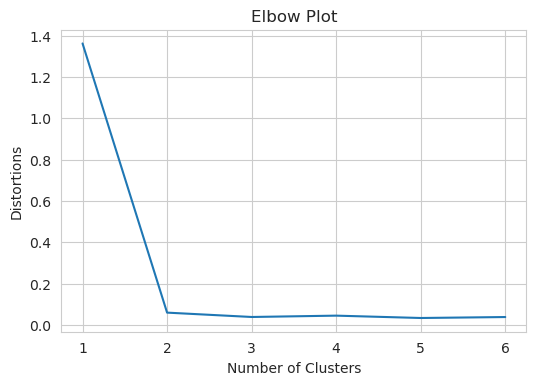

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.vq import kmeans,vq

distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['scaled_red','scaled_blue','scaled_green']],i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters':num_clusters,'distortions':distortions})

# Create a line plot of num_clusters and distortions
plt.figure(dpi=100)
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel("Distortions")
plt.show()

We can see from Elbow Plot, Optimal Number of Cluster

## K-Means Clustering

In [74]:
n = int(input("Number of cluster from the elbow plot: "))
cluster_centers, distortion = kmeans(df[['scaled_red','scaled_blue','scaled_green']],n)
print(cluster_centers)

[[3.49128794 3.49128794 3.49128794]
 [0.96357781 0.96357781 0.96357781]]


### Math
To display the dominant colors, convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula:

converted_pixel = standardized_pixel * pixel_std / 255

In [75]:
# Get standard deviations of each color
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()

colors = []

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

Original Image is ===> 


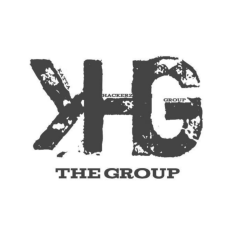

Dominant Colors of Image are===>


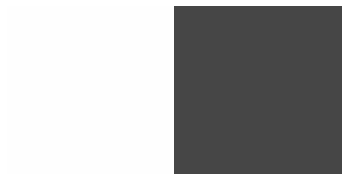

In [76]:
print("Original Image is ===> ")
plt.axis('off')
plt.imshow(image)
plt.show()

# print("Extracting Colors from Image using KMeans Clustering ====>")
# plt.axis('off')
# plt.imshow(arrow)
# plt.show();

print("Dominant Colors of Image are===>")
plt.axis('off')
plt.imshow([colors])
plt.show()